In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)


# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [3]:
p_reset = 0.001
p_meas = 0.001
p_gate1 = 0.001
p_gate2 = 0.001

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = depolarizing_error(p_gate1, 1)
error_gate2 = depolarizing_error(p_gate2, 2)

# Add errors to noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

In [ ]:
def lr_bell_pair(path):

    
    pass
#     c = stim.Circuit()

#     for path in paths:
#         size = len(path)
#         c.append("CNOT", path[:size-(size%2)])
#         c.append("DEPOLARIZE2", path[:size-(size%2)], p)
#     c.append("TICK")

#     for path in paths:
#         size = len(path)
#         c.append("CNOT", path[1:size-1+(size%2)])
#         c.append("DEPOLARIZE2", path[1:size-1+(size%2)], p)
#     c.append("TICK")

#     for path in paths:
#         c.append("H", path[:-1][1::2])
#         c.append("DEPOLARIZE1", path[:-1][2::2], p)
#     c.append("TICK")

#     for path in paths:
#         c.append("X_ERROR", path[1:-1], p)
#         c.append("MR", path[1:-1])
#         c.append("X_ERROR", path[1:-1], p)
#     c.append("TICK")

#     for j, path in enumerate(paths):
#         tot_len = sum([len(p[1:-1]) for p in paths[j:]])
#         size = len(path)
#         for i in range(1 + (size%2), size-1, 2):
#             c.append("CZ", [stim.target_rec(-tot_len+i-1), path[0]])
#         c.append("DEPOLARIZE1", path[0], p)
#         for i in range(2 - (size%2), size-1, 2):
#             c.append("CX", [stim.target_rec(-tot_len+i-1), path[-1]])
#         c.append("DEPOLARIZE1", path[-1], p)
#     c.append("TICK")

#     return c

In [6]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

    

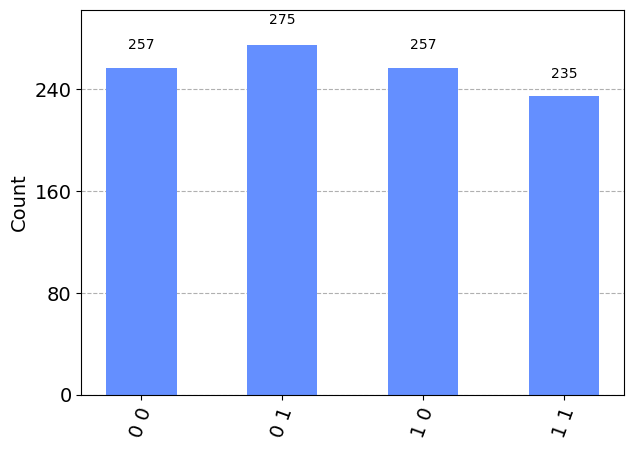

In [7]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(protocol, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)